In [1]:
import os, shutil
import tensorflow as tf
#original_dataset_dir = 'c:/users/xinzhao/.kaggle/competitions/dogs-vs-cats/train/train'
#base_dir = 'c:/users/xinzhao/.kaggle/competitions/dogs-vs-cats/smallset'

original_dataset_dir = 'D:/kaggle/train/train'
base_dir = 'D:/kaggle/train/smallset'

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
tf.Session(config=config)

In [2]:
rerun_0 = 0
rerun_1 = 1
if rerun_1:
    
    train_dir = os.path.join(base_dir, 'train')
    validation_dir = os.path.join(base_dir, 'validation')
    test_dir = os.path.join(base_dir, 'test')

    train_cats_dir = os.path.join(train_dir, 'cats')
    train_dogs_dir = os.path.join(train_dir, 'dogs')

    validation_cats_dir = os.path.join(validation_dir, 'cats')
    validation_dogs_dir = os.path.join(validation_dir, 'dogs')

    test_cats_dir = os.path.join(test_dir, 'cats')
    test_dogs_dir = os.path.join(test_dir, 'dogs')
    
if rerun_0:
    os.mkdir(base_dir)
    os.mkdir(train_dir)
    os.mkdir(validation_dir)
    os.mkdir(test_dir)
    
    os.mkdir(train_cats_dir)
    os.mkdir(train_dogs_dir)
    os.mkdir(validation_cats_dir)
    os.mkdir(validation_dogs_dir)
    os.mkdir(test_cats_dir)
    os.mkdir(test_dogs_dir)

In [3]:
#from  IPython.core.debugger import Pdb; 
#Pdb().set_trace()

if rerun_0:
    fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir,fname)
        dst = os.path.join(train_cats_dir,fname)
        shutil.copyfile(src,dst)
        
    fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir,fname)
        dst = os.path.join(validation_cats_dir,fname)
        shutil.copyfile(src,dst)
    
    fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir,fname)
        dst = os.path.join(test_cats_dir,fname)
        shutil.copyfile(src,dst)
        
    fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir,fname)
        dst = os.path.join(train_dogs_dir,fname)
        shutil.copyfile(src,dst)
        
    fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir,fname)
        dst = os.path.join(validation_dogs_dir,fname)
        shutil.copyfile(src,dst)
    
    fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir,fname)
        dst = os.path.join(test_dogs_dir,fname)
        shutil.copyfile(src,dst)
        

In [4]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [14]:
from keras import layers
from keras import models
from keras import optimizers
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150,150,3))

conv_base.summary()


58892288/58889256 [==============================] - 42s 1us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_poo

In [35]:

model = models.Sequential()
#model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
#model.add(layers.MaxPooling2D((2,2)))
#model.add(layers.Conv2D(64,(3,3), activation='relu'))
#model.add(layers.MaxPooling2D((2,2)))
#model.add(layers.Conv2D(128,(3,3), activation='relu'))
#model.add(layers.MaxPooling2D((2,2)))
#model.add(layers.Conv2D(128,(3,3), activation='relu'))
#model.add(layers.MaxPooling2D((2,2)))

#model.add(layers.Flatten())
#model.add(layers.Dropout(0.5))
#model.add(layers.Dense (512, activation = 'relu'))
#model.add(layers.Dense (1, activation = 'sigmoid'))

conv_base.trainable = False
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense (256, activation = 'relu'))
model.add(layers.Dense (1, activation = 'sigmoid'))


model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss='binary_crossentropy',
             metrics=['acc'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_14 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [36]:

len(model.trainable_weights)

4

In [37]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator (
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=32, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=32, class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [38]:
for data_batch, labels_batch in train_generator:
    print('data batch shape', data_batch.shape)
    print('labels batch shape', labels_batch.shape)
    break

data batch shape (32, 150, 150, 3)
labels batch shape (32,)


In [39]:
history = model.fit_generator(train_generator, 
                              steps_per_epoch=100, 
                              epochs=100, 
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/100
100/100 [==============================] - 49s 488ms/step - loss: 0.3769 - acc: 0.8328 - val_loss: 0.2751 - val_acc: 0.8883
Epoch 2/100
100/100 [==============================] - 14s 143ms/step - loss: 0.2194 - acc: 0.9147 - val_loss: 0.2460 - val_acc: 0.8991
Epoch 3/100
100/100 [==============================] - 14s 142ms/step - loss: 0.1595 - acc: 0.9378 - val_loss: 0.2480 - val_acc: 0.9016
Epoch 4/100
100/100 [==============================] - 14s 143ms/step - loss: 0.1190 - acc: 0.9581 - val_loss: 0.2473 - val_acc: 0.9010
Epoch 5/100
100/100 [==============================] - 14s 143ms/step - loss: 0.0853 - acc: 0.9759 - val_loss: 0.2810 - val_acc: 0.8877
Epoch 6/100
100/100 [==============================] - 14s 144ms/step - loss: 0.0631 - acc: 0.9838 - val_loss: 0.2521 - val_acc: 0.9061
Epoch 7/100
100/100 [==============================] - 15s 148ms/step - loss: 0.0503 - acc: 0.9891 - val_loss: 0.3479 - val_acc: 0.8712
Epoch 8/100
100/100 [===========================

Epoch 60/100
100/100 [==============================] - 15s 150ms/step - loss: 1.1482e-07 - acc: 1.0000 - val_loss: 0.8583 - val_acc: 0.8959
Epoch 61/100
100/100 [==============================] - 15s 152ms/step - loss: 1.1405e-07 - acc: 1.0000 - val_loss: 0.7899 - val_acc: 0.8972
Epoch 62/100
100/100 [==============================] - 15s 151ms/step - loss: 1.1346e-07 - acc: 1.0000 - val_loss: 0.8970 - val_acc: 0.8928
Epoch 63/100
100/100 [==============================] - 15s 151ms/step - loss: 1.1269e-07 - acc: 1.0000 - val_loss: 0.8317 - val_acc: 0.9016
Epoch 64/100
100/100 [==============================] - 15s 151ms/step - loss: 1.1243e-07 - acc: 1.0000 - val_loss: 0.8440 - val_acc: 0.8953
Epoch 65/100
100/100 [==============================] - 15s 152ms/step - loss: 1.1190e-07 - acc: 1.0000 - val_loss: 0.8705 - val_acc: 0.8966
Epoch 66/100
100/100 [==============================] - 15s 151ms/step - loss: 1.1162e-07 - acc: 1.0000 - val_loss: 0.8481 - val_acc: 0.8966
Epoch 67/100


KeyboardInterrupt: 

In [9]:
model.save('cats_and_dogs_small_2.h5')

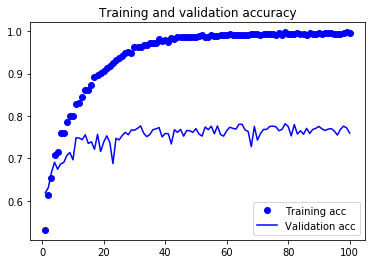

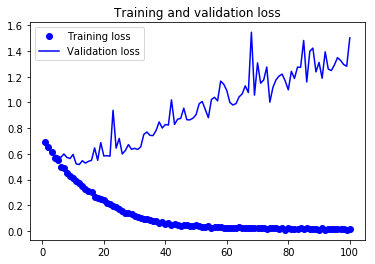

In [11]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.legend()
plt.show()



In [34]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[2]

img = image.load_img(img_path, target_size=(150,150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x,batch_size=1):
    #plt.figure(i)
    #imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i% 8 ==0:
        break
        
#plt.show()